**Engy-5050** Reactor Physics, UMass Lowell, Chem. Eng. Nuclear Program Spring 2022; Prof. V. F. de Almeida

# 1-D Point Source Neutron Transport
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

**Student(s):** Anthony Bowers, Andrew Hamel <br>
**Course:** Engy-5050 Reactor Physics  <br>


UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**7March2022**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [FEM Approach](#app)
 + [Analytical Solution](#analyticalsol)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Setup](#setup)
    - [One-Group Energy](#onegroupenergy)
    - [Two-Group Energy](#twogroupenergy)
* [FDM Approach](#appFDM)
 + [Discretization](#setupFDM)
    - [One-Group Energy](#onegroupenergyFDM)
    - [Two-Group Energy](#twogroupenergyFDM)
* [Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

## [Problem Statement](#toc)<a id="problem"></a>

This investigation looks to determine how Finite Element Method (FEM) computation of the neutron diffusion equation compare to that of the Finite Difference Method (FDM) computation given standard assumptions about the definition of the diffusion coefficient in homogenous mediums far from and close to voids. Defining diffusion coefficients for neutron transport is an active field of research and includes approximations such as isotropic scattering, linear in angle, nonlocal weighting of nearby average transport properties, Monte Carlo study and experiment.

Here we will compare the analytic linear transport result for non-absorbing and moderately absorbing mediums given a point source in spherical geometry. As well as, comaprison of the two computational methods of FEM and FDM. 

For a monoenergetic group time independent neutron diffusion equation (NDE) in written assuming azimuthal symmetry as

Compute $\Phi_g:[r_\text{i},r_\text{o}]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
  \nabla \cdot D_g \nabla \Phi_g(r) - \Sigma_{g,r} \Phi_g(r) + S_{g'\rightarrow g} &= 0 \\
   q_{n,g}(r_\text{i}) &= A_g, \\
   q_{n,g}(r_\text{o}) &= \frac{\alpha}{2}\Phi_g(r_\text{o}).
\end{align*}

where the source term $S_{g'\rightarrow g} := \sum_{g'=1}^{G} \int_\Omega \Sigma_{s,g'\rightarrow g}\, f_{s,g'\rightarrow g}(\mu)\,d\Omega$ is the group down-scattering contribution for each group $g$.

The neutron scalar flux is: $\Phi(r)\ [n/cm^2 s]$ 

The total macroscopic cross section is: $\Sigma_{tot} = \Sigma_{non-el} + \Sigma_{el} \approx \Sigma_{abs} + \Sigma_{el}$

And the removal cross section for the multi group cross section is $ \Sigma_{r} = \Sigma_{tot} - \bar{\mu}\Sigma_{s} $

For brevity, $S' = Q^{fis}_{ext} + Q^{sc}_{in}$, is written as the combined source for exterior sources and fission sources or scatter in from out of group (up and down scatter). The full _scatter in term_ requires a _group averaged scatter cross section_ that further requires a _transfer function_ differential in post collision direction $\Omega \cdot \Omega '$. 

Here for the free surface (vacuum) boundary condition. The neutron density at the outer boundary $\Phi(r) = |v| n(r) = 0$ if $ n_b\cdot \Omega < 0 $.

### Domain
The domain utilized in the simulation is spherical geometry containt a point source. Surronding the point source is light-water.

## [FEM Approach](#toc)<a id="app"></a>

### [Analytic Solution](#toc)<a id="analyticalsol"></a> 

A general solution is commonly given without the asymptotic condition as:

\begin{align*}
    \Phi(r) =  \frac{S_0 e^{-\kappa r}}{4\pi Dr} \ \ \ (2)
\end{align*}



### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 

The Galerkin weak formulation of the [strong form](#strongform) is as follows. Find $\Phi_g \in H^1\!\bigl([r_\text{i},r_\text{o}]\bigr)$ and $u_2 \in H^1\!\bigl([a,b]\bigr)$
so that 

\begin{align*}
\int\limits_a^b D\, u_1'(x)\,w'(x)\,dx - \int\limits_a^b S(u_1, u_2)\,w(x)\,dx &= 0 \quad \forall \quad v \in H^1_0\!\bigl([a,b]\bigr), \text{and}
 \\
  \int\limits_a^b v\, u_2'(x)\, w(x)\,dx + \int\limits_a^b D\, u_2'(x)\,w'(x)\,dx + \int\limits_a^b S(u_1, u_2)\,w(x)\,dx &= 0 \quad \forall \quad v \in H^1_0\!\bigl([a,b]\bigr),
\end{align*}

where $H^1\!\bigl([a,b]\bigr) := \bigl\{ u:[a,b]\subset\Reals\rightarrow \Reals \mid \int_a^b u'^2\,dx < \infty\bigr\}$ and $H^1_0\!\bigl([a,b]\bigr) := \bigl\{ w \mid w \in H^1(a,b), w(a) = 0, w(b) =0 \bigr\}$. Both function sets as just defined are Hilbert spaces. The function $w$ is called a test function. Because $w$, $u_1$, $u_2$ are sought in very similar sets of functions, this weak form is called Galerkin's weak form.

1. Multiply NDE by a test function $\phi$.
2. Integrate over spatial and angular domain.
3. Use divergence theorem to set the boundary condition across the domain surface.

The weak form and boundary condition becomes:

\begin{align*}
    ( \nabla \phi, D \nabla \Phi  )\ - < \phi, D \nabla \Phi \cdot \bar{n_b} > +\ (\phi , \Sigma_{tot} \Phi) = 0 \ \ \ (1B)
\end{align*}

This weak form contains the volume and surface integral as written with parenthesis and brackets respectively. The boundary conditions for the partial currents at the surface given as $\Gamma^{\pm}$ must be solved for:

\begin{align*}
    \Gamma^{+} = J^{out}({R_S}) = \nabla \Phi \cdot \bar{n_b}
\end{align*}

\begin{align*}
    \Gamma^{-} = J^{in}({R_S}) = 0
\end{align*}

Here we will use the homogenous Neumann boundary condition, which is equivalent to the Robin Vacuum boundary condition such that the reflectivity at the boundary is 0 as:

\begin{align*}
    \frac{1}{4} \Phi + \frac{1}{2} D \nabla \Phi \cdot \bar{n_b} = J^{-} = \frac{\Phi}{4} - \frac{J}{2} = \frac{\Phi}{4} - \frac{D \nabla \Phi}{2}
\end{align*}

Solving for the weak form boundary condition and multiplying our test function $\phi$:

\begin{align*}
     \phi (D \nabla \Phi \cdot \bar{n_b}) = \phi( \frac{1}{2} D \nabla \Phi)
\end{align*}

#### 2 Group NDE  Weak Form:

Assuming no upscattering from group 2 to group 1:

\begin{align*}
    -\nabla \cdot D_1 \nabla \Phi_1(r)  + \Sigma_{r,1} \Phi_1(r) =  0 \ \ \ 
\end{align*}

\begin{align*}
    -\nabla \cdot D_2 \nabla \Phi_2(r)  + \Sigma_{r,2} \Phi_2(r) =  -\Sigma_{s,1 \rightarrow 2} \Phi_1(r) \ \ \  
\end{align*}


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### [One-Group Energy](#toc)<a id="onegroupenergy"></a>

In [14]:
#!rm output1G*.csv
!./neutron__transport-opt -i input_test.hit




Framework Information:
MOOSE Version:           git commit 1d1b703aef on 2021-08-22
LibMesh Version:         
PETSc Version:           3.15.1
SLEPc Version:           3.15.1
Current Time:            Thu Mar 10 13:02:00 2022
Executable Timestamp:    Tue Mar  8 13:25:00 2022

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   20001
  Elems:                   10000
  Num Subdomains:          1

Nonlinear System:
  Num DOFs:                40002
  Num Local DOFs:          40002
  Variables:               { "u1" "u2" } 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Execution Information:
  Executioner:             Steady
  Solver Mode:             NEWTON
  PETSc Preconditioner:    lu 
  MOOSE Preconditioner:    FDP



*** Warning ***
/home/anthonyb08/projects/neutron__transport/input_test.hit:10: unused parame

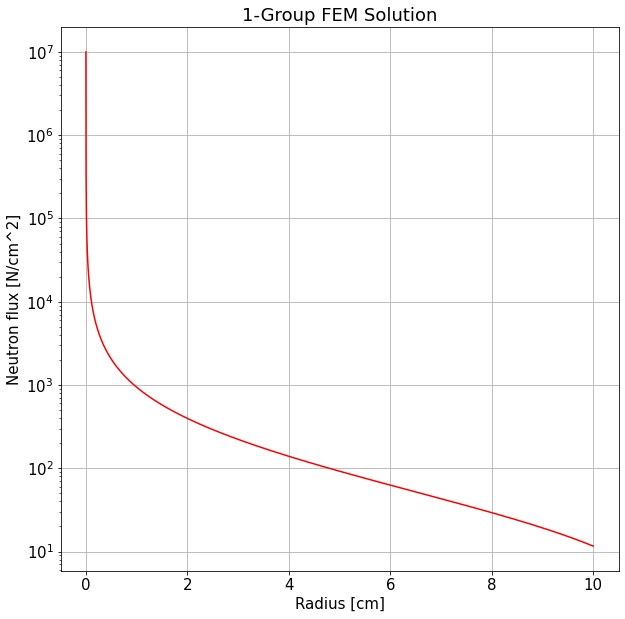

In [15]:
import pandas as pd
df = pd.read_csv('output1G_x-data_0002.csv')
#plot_solution(df, title='Dirichlet BC FEM Solution', basis_functions_type='Linear Lagrange', flux_basis_functions_type='Constant Monomial')
#print(df)
fig = plt.figure(figsize=(10,10))
plt.plot(df["x"],df["u1"],"r-")
plt.yscale("log")
#plt.xlim(0,100)
plt.xlabel("Radius [cm]")
plt.ylabel("Neutron flux [N/cm^2]")
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.title("1-Group FEM Solution")
plt.grid()
plt.show()

#### [Two-Group Energy](#toc)<a id="twogroupenergy"></a>

In [16]:
!rm output2G*.csv
!./neutron__transport-opt -i input2G.hit



Framework Information:
MOOSE Version:           git commit 1d1b703aef on 2021-08-22
LibMesh Version:         
PETSc Version:           3.15.1
SLEPc Version:           3.15.1
Current Time:            Thu Mar 10 13:02:07 2022
Executable Timestamp:    Tue Mar  8 13:25:00 2022

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   20001
  Elems:                   10000
  Num Subdomains:          1

Nonlinear System:
  Num DOFs:                40002
  Num Local DOFs:          40002
  Variables:               { "u1" "u2" } 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Execution Information:
  Executioner:             Steady
  Solver Mode:             NEWTON
  PETSc Preconditioner:    lu 
  MOOSE Preconditioner:    FDP



*** Warning ***
/home/anthonyb08/projects/neutron__transport/input2G.hit:11: unused parameter

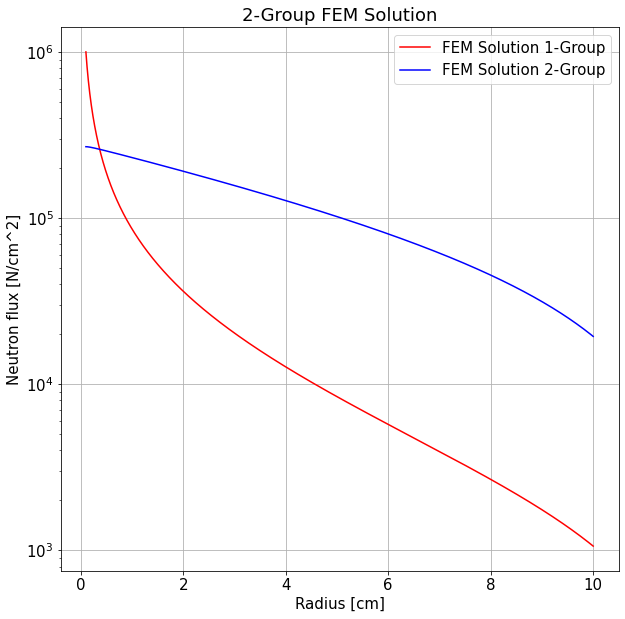

In [17]:
import pandas as pd
df = pd.read_csv('output2G_x-data_0002.csv')
fig = plt.figure(figsize=(10,10))
plt.plot(df["x"],df["u1"],"r-",label="FEM Solution 1-Group")
plt.plot(df["x"],df["u2"],"b-",label="FEM Solution 2-Group")
plt.yscale("log")
#plt.xlim(0,100)
plt.grid()
plt.legend()
plt.xlabel("Radius [cm]")
plt.ylabel("Neutron flux [N/cm^2]")
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.title("2-Group FEM Solution")
plt.show()

## [FDM Approach](#toc)<a id="appFDM"></a>

### [Discretization](#toc)<a id="setupFDM"></a> 

For the discretization of the NDE a central approximation  is utilized, where for its respected differential 



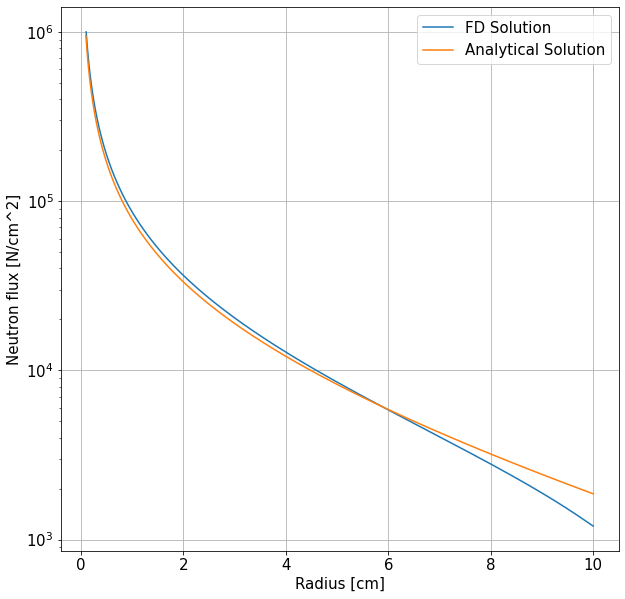

In [18]:
So = 1e6
N = 2000
rn = 10
r0 = 0.1
phi0 = So
alpha = 1

sigma_s = 0.022
D=0.87

h = (rn-r0)/(N+1)
r = np.arange(r0+h, rn, h)

A = np.zeros((N,N))
B = np.zeros(N)

A[0,0] = -sigma_s/D * h**2 - 2
A[0,1] = 1 + (h/(r0))
B[0] = -phi0 * (1-h/r0)

for i in range(1,N-1):
    A[i,i-1] = (1-(h/r[i]))
    A[i,i] = -sigma_s/D * h**2 - 2
    A[i,i+1] = 1 + (h/r[i])
    B[i] = 0

A[-1,-1] = (-h * alpha - 2 - h**2 * alpha/rn - sigma_s * h**2 / D)
A[-1,-2] = 1 + 1+h/rn-h/rn
B[-1] = 0

L = np.sqrt(D/sigma_s)

group1 = np.linalg.solve(A , B)
group1 = np.concatenate((np.array([phi0]),group1,np.array([group1[-1]])))

r = np.concatenate((np.array([r0]),r,np.array([rn])))


x = np.linspace(0.1-h,10,N)
y = So/(4*np.pi * x * D)*np.exp(-x/L)

fig = plt.figure(figsize=(10,10))
plt.plot(r,group1,label="FD Solution")
plt.plot(x,y,label="Analytical Solution")
plt.xlabel("Radius [cm]")
plt.ylabel("Neutron flux [N/cm^2]")
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.yscale("log")
plt.grid()
plt.legend()
plt.savefig("AnalyticalFDSolution.png",dpi=300)
plt.show()

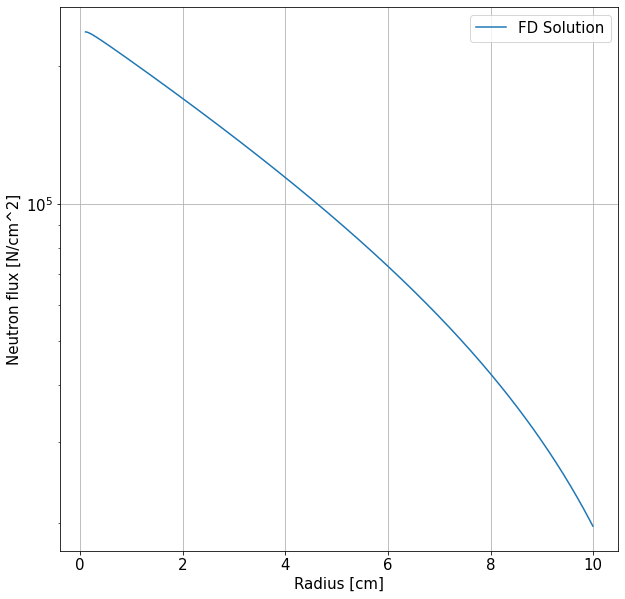

In [19]:
#Two group Finite Difference Method
So = 1e6
N = 2000
rn = 10
r0 = 0.1
phi0 = So
alpha = 1
sigma_1=0.022
sigma_2 = 0.022
sigma_12=0.87

D=0.87
L1 = np.sqrt(D/sigma_1)
h = (rn-r0)/(N+1)
r = np.arange(r0+h, rn, h)

A = np.zeros((N,N))
B = np.zeros(N)

A[0,0] = -sigma_2/D * h**2 - 2
A[0,1] = 2
B[0] = -sigma_12*h**2*group1[0]
#*So*np.exp(-r0/L1)/(4*np.pi*r0*D)

for i in range(1,N-1):
    A[i,i-1] = (1-(h/r[i]))
    A[i,i] = -sigma_2/D * h**2 - 2
    A[i,i+1] = 1 + (h/r[i])
    B[i] = -sigma_12*h**2*group1[i]
    #So*np.exp(-r[i]/L1)/(4*np.pi*r[i]*D)

A[-1,-1] = (-h * alpha - 2 - h**2 * alpha/rn - sigma_2 * h**2 / D)
A[-1,-2] = 1 + 1+h/rn-h/rn
B[-1] = -sigma_12*h**2*group1[-1]
#So*np.exp(-rn/L1)/(4*np.pi*rn*D)

L = np.sqrt(D/sigma_1)

group2 = np.linalg.solve(A , B)

#group2 = np.concatenate((np.array([phi0]),group2,np.array([group1[-1]])))
#r = np.concatenate((np.array([r0]),r,np.array([rn])))


x = np.linspace(0.1-h,10,N)
y = So/(4*np.pi * x * D)*np.exp(-x/L)

fig = plt.figure(figsize=(10,10))
plt.plot(r,group2,label="FD Solution")
#plt.plot(x,y,label="Analytical Solution")
plt.xlabel("Radius [cm]")
plt.ylabel("Neutron flux [N/cm^2]")
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.yscale("log")
plt.grid()
plt.legend()
plt.savefig("AnalyticalFDSolution.png",dpi=300)
plt.show()

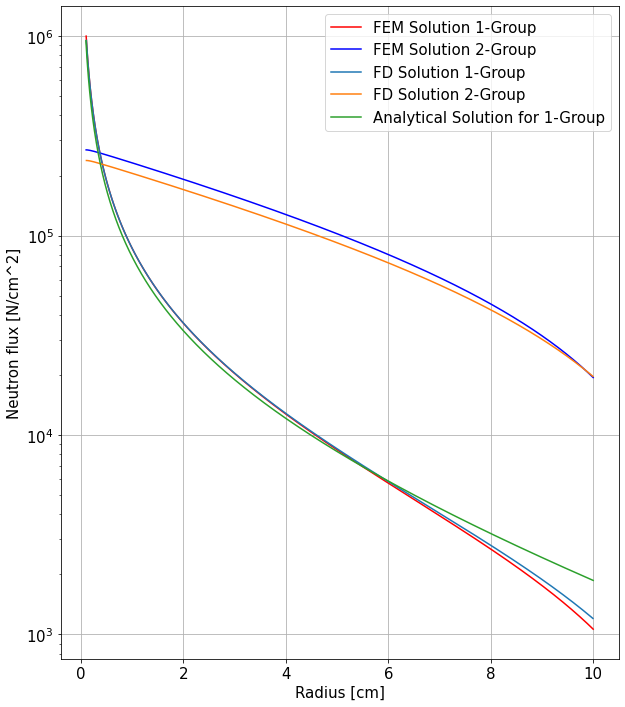

In [20]:
fig = plt.figure(figsize=(10,12))
plt.plot(df["x"],df["u1"],"r-",label="FEM Solution 1-Group")
plt.plot(df["x"],df["u2"],"b-",label="FEM Solution 2-Group")

plt.plot(r,group1[1:-1],label="FD Solution 1-Group")

#newely added
plt.plot(r,group2,label="FD Solution 2-Group")

plt.plot(x,y,label="Analytical Solution for 1-Group")
plt.yscale("log")
#plt.xlim(0,100)
plt.grid()
plt.legend()
plt.xlabel("Radius [cm]")
plt.ylabel("Neutron flux [N/cm^2]")
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.savefig("Analytical_FD_FEM_Sols.png",dpi=300)
plt.show()

## [Results and Analysis](#toc)<a id="ranalysis"></a>